In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cardio_train.csv', sep =';', index_col= 0, )  # read in the dataset

In [3]:
df.head()  # print out the first 5 rows

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,17474,1,156,56.00,100,60,1,1,0,0,0,0


0   0.50
1   0.50
Name: cardio, dtype: float64


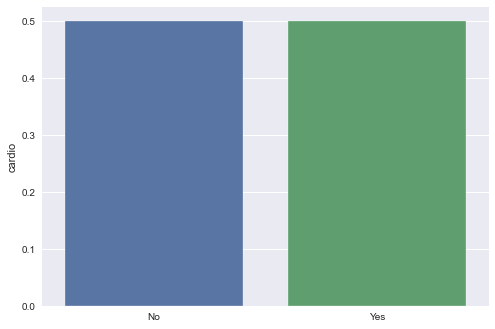

In [4]:
# check for class imbalace
print(df['cardio'].value_counts(normalize =True))
sns.barplot(y = df['cardio'].value_counts(normalize = True), x = ['No', 'Yes'] )

* Initially, the data set seems to be perfectly balanced in the target variable.

In [5]:
df.dtypes  # check the feature types

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
df.isnull().sum().any()  # check for any missing values

False

In [8]:
# change the gender column into their original categorical values so we can make dummy columns later
gender_dict = {1: 'female', 2: 'male'}  # make the mapping dictionary
df['gender'] = df.gender.map(gender_dict)
print(df.gender.value_counts())  # check the transformed column values

female    45530
male      24470
Name: gender, dtype: int64


In [9]:
df['age'] = df['age']/365  # convert age from days to years

In [10]:
df['height'] = df['height']/100  # convert height from CM to M

In [11]:
# create a mapping dictionary for the categorical columns about blood-sugar level
sugar_level_dict = {1: 'normal', 2:'above normal', 3:'well above normal'}

In [12]:
df['gluc'] = df['gluc'].map(sugar_level_dict)  # trasnform the columns into categorical
print(df.gluc.value_counts(dropna = False))

df['cholesterol'] = df['cholesterol'].map(sugar_level_dict)
print(df['cholesterol'].value_counts(dropna = False))  # check the values to confirm

normal               59479
well above normal     5331
above normal          5190
Name: gluc, dtype: int64
normal               52385
above normal          9549
well above normal     8066
Name: cholesterol, dtype: int64


In [13]:
df.active.value_counts()  # check the values of subjective columns 

1    56261
0    13739
Name: active, dtype: int64

In [18]:
df.describe()  # check the descriptive statistics for outlier values

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,69888.00,69888.00,69888.00,69888.00,69888.00,69888.00,69888.00,69888.00,69888.00
mean,53.34,1.64,74.12,128.81,96.58,0.09,0.05,0.80,0.50
std,6.76,0.08,14.10,154.13,188.45,0.28,0.23,0.40,0.50
min,29.58,1.05,31.00,-150.00,-70.00,0.00,0.00,0.00,0.00
25%,48.40,1.59,65.00,120.00,80.00,0.00,0.00,1.00,0.00
50%,53.98,1.65,72.00,120.00,80.00,0.00,0.00,1.00,0.00
75%,58.43,1.70,82.00,140.00,90.00,0.00,0.00,1.00,1.00
max,64.97,2.07,149.00,16020.00,11000.00,1.00,1.00,1.00,1.00


In [15]:
# restrict the data for patients over 3.33 feet and less than 7 feet
df = df[(df['height'] > 1) & (df['height'] < 2.125)].copy()  # 0.04% data was lost in total

In [17]:
# restrict weight between 30kg and 150kg
df = df[(df['weight'] > 30) & (df['weight'] < 150)].copy()  # 0.16% data was lost in total

In [20]:
# make a BMI column where BMI = weight(kg) / [height(m)]**2
df['bmi'] = df['weight']/(df['height']**2)

In [21]:
# restric BMI between 15 & 35
df = df[(df['bmi'] < 35) & (df['bmi'] > 15)].copy()

In [203]:
df.describe()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi
count,63688.000,63688.000,63688.000,63688.000,63688.000,63688.000,63688.000,63688.000,63688.000,63688.000
mean,53.231,1.648,71.633,127.865,94.705,0.091,0.054,0.805,0.482,26.356
std,6.767,0.078,11.448,152.814,185.631,0.287,0.225,0.396,0.500,3.734
min,29.584,1.250,32.000,1.000,1.000,0.000,0.000,0.000,0.000,15.012
25%,48.266,1.600,64.000,120.000,80.000,0.000,0.000,1.000,0.000,23.665
50%,53.915,1.650,70.000,120.000,80.000,0.000,0.000,1.000,0.000,25.865
75%,58.335,1.700,79.000,140.000,90.000,0.000,0.000,1.000,1.000,29.001
max,64.967,2.070,125.000,16020.000,10000.000,1.000,1.000,1.000,1.000,34.997


* We got rid of 9% of data by removing extreme values.
* Data is still very balanced in the target variable: `0.52 : 0.48`

In [23]:
bp_cols = ['ap_hi','ap_lo']  # store the blood pressure column indexes in a list

In [24]:
df.loc[:,bp_cols].describe()  # check their stats

,ap_hi,ap_lo
count,63709.00,63709.00
mean,127.90,94.67
std,152.96,185.61
min,-150.00,-70.00
25%,120.00,80.00
50%,120.00,80.00
75%,140.00,90.00
max,16020.00,10000.00


In [206]:
df = df[df['ap_lo'] > 0]

In [207]:
df['ap_hi'] = df['ap_hi'].apply(lambda x: x * (-1) if x < 0 else x)

In [230]:
df[(df['ap_lo'] >= 1000) & (df['ap_lo'] <= 1400)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,


In [267]:
df['ap_lo'] = df['ap_lo'].apply(lambda x: x/10 if (x >= 500) & (x <=1400) else
                               (x/100 if (x > 1400) else x))

In [263]:
df['ap_hi'] = df['ap_hi'].apply(lambda x: x/10 if (x >= 900) & (x <=2400) else
                                (x/100 if x> 2400 else x))

In [273]:
df[df['ap_hi'] > 240] # just one entry

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
58349,54.263,female,1.620,67.000,401.000,80.000,normal,well above normal,0,0,1,1,25.530


In [277]:
df['bmi_cat'] = pd.cut(df['bmi'], right= False, bins = [0,18.5,25,30,36], 
                       labels=['underweight','normal','overweight','obese'])
df['bmi_cat'].value_counts(dropna = False)

normal         25657
overweight     25201
obese          12210
underweight      620
Name: bmi_cat, dtype: int64

In [284]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
id,,,,,,,,,,,,,,
0,50.39,male,1.68,62.00,110.00,80.00,normal,normal,0,0,1,0,21.97,normal
1,55.42,female,1.56,85.00,140.00,90.00,well above normal,normal,0,0,1,1,34.93,obese
2,51.66,female,1.65,64.00,130.00,70.00,well above normal,normal,0,0,0,1,23.51,normal
3,48.28,male,1.69,82.00,150.00,100.00,normal,normal,0,0,1,1,28.71,overweight
4,47.87,female,1.56,56.00,100.00,60.00,normal,normal,0,0,0,0,23.01,normal


In [290]:
df.groupby('bmi_cat')['cardio'].mean()

bmi_cat
underweight   0.27
normal        0.40
overweight    0.51
obese         0.60
Name: cardio, dtype: float64

In [299]:
dummy_df = pd.get_dummies(df, columns=['bmi_cat'], prefix = '', prefix_sep = '', drop_first= True)

In [300]:
dummy_df.corr().abs()['cardio']

age          0.24
height       0.00
weight       0.15
ap_hi        0.40
ap_lo        0.33
smoke        0.01
alco         0.01
active       0.04
cardio       1.00
bmi          0.17
normal       0.13
overweight   0.05
obese        0.12
Name: cardio, dtype: float64